In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as st
import statsmodels.api as sm

read_path = r'C:\Users\Julia\Documents\Uni\Master\1\Data-Literacy\Data-Literacy\Data\joined_survey_article_standardized_median.csv'
df = pd.read_csv(read_path, delimiter=';', header=0)
df["date"] = pd.to_datetime(df["date"], format="%d.%m.%Y")
df["SPD"] = pd.to_numeric(df["SPD"], errors='coerce')
df["Union"] = pd.to_numeric(df["Union"], errors='coerce')
df["Grüne"] = pd.to_numeric(df["Grüne"], errors='coerce')
df["FDP"] = pd.to_numeric(df["FDP"], errors='coerce')
df["AfD"] = pd.to_numeric(df["AfD"], errors='coerce')
df["Linke"] = pd.to_numeric(df["Linke"], errors='coerce')

In [14]:
# party to analyse
party = 'Grüne'

In [15]:
# Iraq war
this_df = df[(df['date'].dt.year >= 2002) & (df['date'].dt.year <= 2004)]

# ukraine war
#this_df = df[(df['date'].dt.year >= 2022)]

high_values = this_df[this_df['standardized_war_articles'] >= 0.2]
first = high_values['date'].iloc[-1]
last = high_values['date'].iloc[0]


In [16]:
# training 
data_before_war = df[(df['date'] <= first) & (~df[party].isna())]
X_train = data_before_war.index.values.reshape(-1,1)

polynomial_features= PolynomialFeatures(degree=3)
X_train_poly = polynomial_features.fit_transform(X_train)
y_train = data_before_war[party]


In [17]:
# testing
data_war = df[(df['date'] >= first) & (df['date'] <= last)]

X_test = data_war.index.values.reshape(-1,1)
polynomial_features= PolynomialFeatures(degree=3)
X_test_poly = polynomial_features.fit_transform(X_test)
y_test = data_war[party]

In [18]:
model = sm.OLS(y_train, X_train_poly).fit()
y_train_pred = model.predict(X_train_poly) 

In [19]:
y_test_pred = model.predict(X_test_poly) 

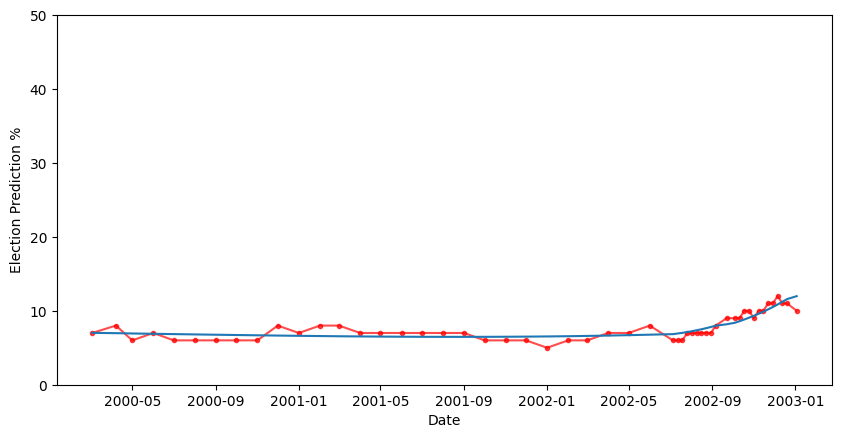

In [20]:
# plot
fig, ax1 = plt.subplots()
fig.set_figwidth(10) 
ax1.set_ylim([0, 50])
ax1.set_xlabel('Date') 
ax1.set_ylabel('Election Prediction %')
ax1.plot(data_before_war['date'], data_before_war[party], marker='.', linestyle='-',label=party, color='red', alpha=0.7)
ax1.plot(data_before_war['date'],y_train_pred)

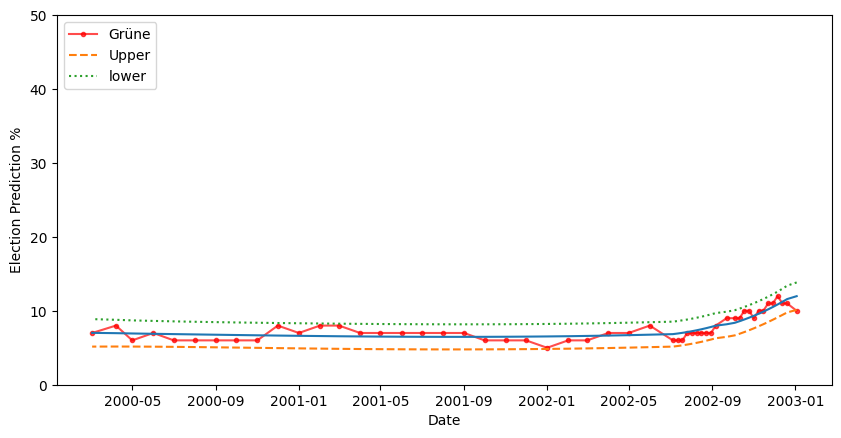

In [21]:
# plot with confidence interval
from statsmodels.sandbox.regression.predstd import wls_prediction_std
_, upper,lower = wls_prediction_std(model)

fig, ax1 = plt.subplots()
fig.set_figwidth(10) 
ax1.set_ylim([0, 50])
ax1.set_xlabel('Date') 
ax1.set_ylabel('Election Prediction %')
ax1.plot(data_before_war['date'], data_before_war[party], marker='.', linestyle='-',label=party, color='red', alpha=0.7)
ax1.plot(data_before_war['date'],y_train_pred)
ax1.plot(data_before_war['date'],upper,'--',label="Upper") # confid. intrvl
ax1.plot(data_before_war['date'],lower,':',label="lower")
ax1.legend(loc='upper left')

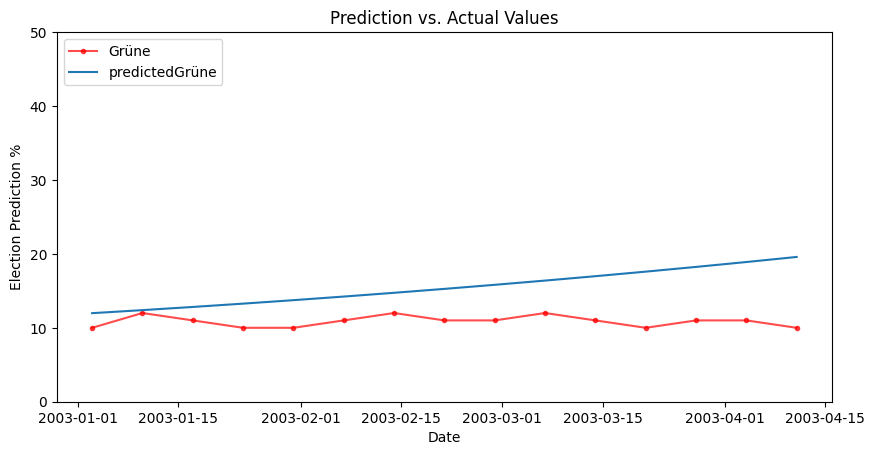

In [22]:
# predicted vs actual values
from statsmodels.sandbox.regression.predstd import wls_prediction_std
_, upper,lower = wls_prediction_std(model)

fig, ax1 = plt.subplots()
fig.set_figwidth(10) 
ax1.set_ylim([0, 50])
ax1.set_xlabel('Date') 
ax1.set_ylabel('Election Prediction %')
ax1.plot(data_war['date'], data_war[party], marker='.', linestyle='-',label=party, color='red', alpha=0.7)
ax1.plot(data_war['date'],y_test_pred, label = "predicted" + party)
ax1.set_title("Prediction vs. Actual Values")
#ax1.plot(data_war['date'],upper,'--',label="Upper") # confid. intrvl
#ax1.plot(data_war['date'],lower,':',label="lower")
ax1.legend(loc='upper left')

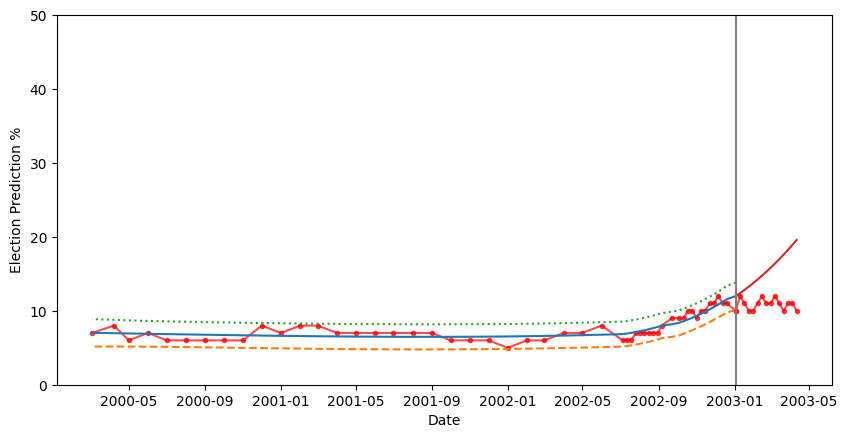

In [24]:
# plot with confidence interval
from statsmodels.sandbox.regression.predstd import wls_prediction_std
_, upper,lower = wls_prediction_std(model)

fig, ax1 = plt.subplots()
fig.set_figwidth(10) 
ax1.set_ylim([0, 50])
ax1.set_xlabel('Date') 
ax1.set_ylabel('Election Prediction %')
ax1.plot(data_before_war['date'], data_before_war[party], marker='.', linestyle='-',label=party, color='red', alpha=0.7)
ax1.plot(data_before_war['date'],y_train_pred)
ax1.plot(data_before_war['date'],upper,'--',label="Upper") # confid. intrvl
ax1.plot(data_before_war['date'],lower,':',label="lower")

ax1.plot(data_war['date'],y_test_pred)
ax1.plot(data_war['date'], data_war[party], marker='.', linestyle='-',label=party, color='red', alpha=0.7)


ax1.vlines(first, ymin=0, ymax=50, colors="grey")

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


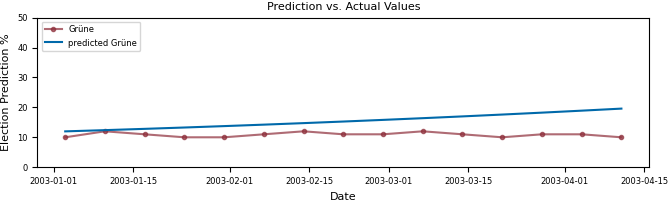

In [ ]:
## Example tueplots
# its not saving as a pdf..

# predicted vs actual values
from statsmodels.sandbox.regression.predstd import wls_prediction_std
_, upper,lower = wls_prediction_std(model)

from tueplots import bundles
# # this provides the color palette of Uni Tuebingen
from tueplots.constants.color.palettes import rgb
# # e.g. as rgb.tue_blue, rgb.tue_red, etc.

# # set plotting stylesheet

#half of page
#plt.rcParams.update(bundles.icml2022(column='half', nrows=1, ncols=1, usetex=False))
# full page
plt.rcParams.update(bundles.icml2022(column='full', nrows=1, ncols=2, usetex=False))

# plotting code goes here
fig, ax1 = plt.subplots()
ax1.set_ylim([0, 50])
ax1.set_xlabel('Date') 
ax1.set_ylabel('Election Prediction %')
ax1.plot(data_war['date'], data_war[party], marker='.', linestyle='-',label=party, color=rgb.tue_red, alpha=0.7)
ax1.plot(data_war['date'],y_test_pred, label = "predicted " + party, color = rgb.tue_blue)
ax1.set_title("Prediction vs. Actual Values")
ax1.legend(loc='upper left')

plt.savefig('your_plot.pdf', format='pdf')

plt.show()
# this file can now by used as \includegraphics{filename}
